# Analyzing Syllabi

In [43]:
import matplotlib
import pandas as pd
import seaborn
%matplotlib inline


In [336]:
df = pd.read_csv("disciplines-per-course.csv")
df.head()

,discipline,course,school,program,aggregates
0,cs,berkeley-info202,Berkeley,MIMS,Computer Science
1,news,berkeley-info202,Berkeley,MIMS,News
2,psych,berkeley-info202,Berkeley,MIMS,Social Sciences
3,med,berkeley-info202,Berkeley,MIMS,Science
4,cs,berkeley-info202,Berkeley,MIMS,Computer Science


In [337]:
disciplinary_breakdown_by_course = df.groupby(["school","program","aggregates"]).size()
disciplinary_breakdown_by_course.head()

school    program  aggregates         
Berkeley  MIMS     Computer Science       6
                   HCI                    3
                   Humanities             4
                   Information Science    1
                   Law                    3
dtype: int64

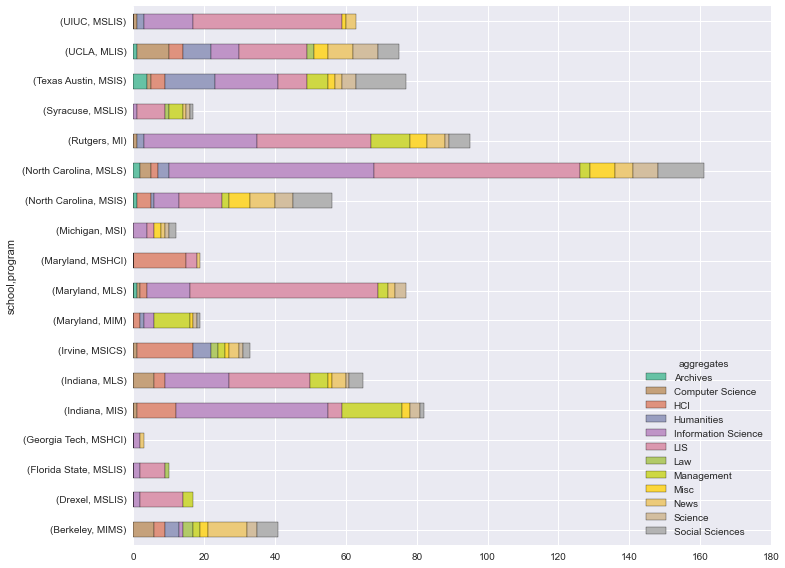

In [338]:
ax = disciplinary_breakdown_by_course.unstack(level=2).plot(kind="barh", 
                                                            stacked=True, 
                                                            figsize=(11,8), 
                                                            colormap="Set2",
                                                            )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("raw_discipline_breakdown.pdf")

## proportions per course

In [339]:
raw_course_discipline_counts = df.groupby(["course","aggregates"]).size()
raw_course_discipline_counts.head()

course            aggregates         
berkeley-info202  Computer Science       3
                  Information Science    1
                  Management             1
                  News                   6
                  Science                2
dtype: int64

In [340]:
discipline_proportion_per_course = raw_course_discipline_counts.div(raw_course_discipline_counts.sum(level="course"), level="course")*100

In [341]:
discipline_proportion_per_course.unstack(level=1).fillna(0).to_csv("discipline_proportion_per_course.csv")

## Proportions per program

In [342]:
raw_programs_discipline_counts = df.groupby(["school","program","aggregates"]).size()
raw_programs_discipline_counts


school         program  aggregates         
Berkeley       MIMS     Computer Science        6
                        HCI                     3
                        Humanities              4
                        Information Science     1
                        Law                     3
                        Management              2
                        Misc                    2
                        News                   11
                        Science                 3
                        Social Sciences         6
Drexel         MSLIS    Information Science     2
                        LIS                    12
                        Management              3
Florida State  MSLIS    Information Science     2
                        LIS                     7
                        Law                     1
Georgia Tech   MSHCI    Information Science     2
                        News                    1
Indiana        MIS      Computer Science        1
      

In [343]:
total_program_counts = raw_programs_discipline_counts.groupby(level=['school','program']).sum()
total_program_counts

school          program
Berkeley        MIMS        41
Drexel          MSLIS       17
Florida State   MSLIS       10
Georgia Tech    MSHCI        3
Indiana         MIS         82
                MLS         65
Irvine          MSICS       33
Maryland        MIM         19
                MLS         77
                MSHCI       19
Michigan        MSI         12
North Carolina  MSIS        56
                MSLS       161
Rutgers         MI          95
Syracuse        MSLIS       17
Texas Austin    MSIS        77
UCLA            MLIS        75
UIUC            MSLIS       63
dtype: int64

In [344]:
proportion_per_program = raw_programs_discipline_counts.unstack().div(total_program_counts, axis=0) * 100

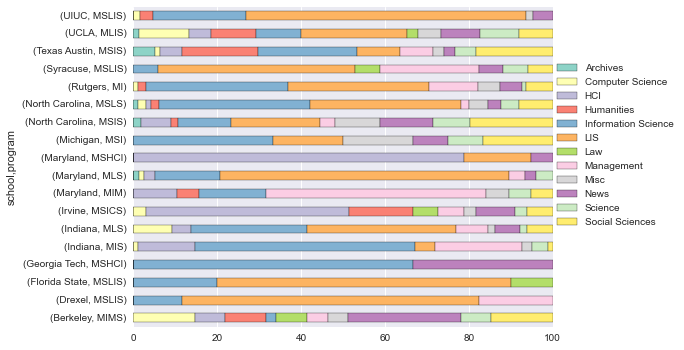

In [347]:
ax = proportion_per_program.plot(kind="barh", 
                                 stacked=True, 
                                 figsize=(11,8), 
                                 colormap="Set3",
                                 )

ax.set_xlim(0,100)
ax.legend(bbox_to_anchor=(1.31, .85))

fig = ax.get_figure()
fig.tight_layout(pad=12)
fig.savefig("proportion_per_program.pdf")

In [355]:
proportion_per_program

aggregates              Archives  Computer Science        HCI  Humanities  \
school         program                                                      
Berkeley       MIMS          NaN         14.634146   7.317073    9.756098   
Drexel         MSLIS         NaN               NaN        NaN         NaN   
Florida State  MSLIS         NaN               NaN        NaN         NaN   
Georgia Tech   MSHCI         NaN               NaN        NaN         NaN   
Indiana        MIS           NaN          1.219512  13.414634         NaN   
               MLS           NaN          9.230769   4.615385         NaN   
Irvine         MSICS         NaN          3.030303  48.484848   15.151515   
Maryland       MIM           NaN               NaN  10.526316    5.263158   
               MLS      1.298701          1.298701   2.597403         NaN   
               MSHCI         NaN               NaN  78.947368         NaN   
Michigan       MSI           NaN               NaN        NaN         NaN   
North Carolina MSIS     1.785714               NaN   7.142857    1.785714   
               MSLS     1.242236          1.863354   1.242236    1.863354   
Rutgers        MI            NaN          1.052632        NaN    2.105263   
Syracuse       MSLIS         NaN               NaN        NaN         NaN   
Texas Austin   MSIS     5.194805          1.298701   5.194805   18.181818   
UCLA           MLIS     1.333333         12.000000   5.333333   10.666667   
UIUC           MSLIS         NaN          1.587302        NaN    3.174603   

aggregates              Information Science        LIS        Law  Management  \
school         program                                                          
Berkeley       MIMS                2.439024        NaN   7.317073    4.878049   
Drexel         MSLIS              11.764706  70.588235        NaN   17.647059   
Florida State  MSLIS              20.000000  70.000000  10.000000         NaN   
Georgia Tech   MSHCI              66.666667        NaN        NaN         NaN   
Indiana        MIS                52.439024   4.878049        NaN   20.731707   
               MLS                27.692308  35.384615        NaN    7.692308   
Irvine         MSICS                    NaN        NaN   6.060606    6.060606   
Maryland       MIM                15.789474        NaN        NaN   52.631579   
               MLS                15.584416  68.831169        NaN    3.896104   
               MSHCI                    NaN  15.789474        NaN         NaN   
Michigan       MSI                33.333333  16.666667        NaN         NaN   
North Carolina MSIS               12.500000  21.428571        NaN    3.571429   
               MSLS               36.024845  36.024845        NaN    1.863354   
Rutgers        MI                 33.684211  33.684211        NaN   11.578947   
Syracuse       MSLIS               5.882353  47.058824   5.882353   23.529412   
Texas Austin   MSIS               23.376623  10.389610        NaN    7.792208   
UCLA           MLIS               10.666667  25.333333   2.666667         NaN   
UIUC           MSLIS              22.222222  66.666667        NaN         NaN   

aggregates                   Misc       News   Science  Social Sciences  
school         program                                                   
Berkeley       MIMS      4.878049  26.829268  7.317073        14.634146  
Drexel         MSLIS          NaN        NaN       NaN              NaN  
Florida State  MSLIS          NaN        NaN       NaN              NaN  
Georgia Tech   MSHCI          NaN  33.333333       NaN              NaN  
Indiana        MIS       2.439024        NaN  3.658537         1.219512  
               MLS       1.538462   6.153846  1.538462         6.153846  
Irvine         MSICS     3.030303   9.090909  3.030303         6.060606  
Maryland       MIM       5.263158        NaN  5.263158         5.263158  
               MLS            NaN   2.597403  3.896104              NaN  
               MSHCI    

In [356]:
proportion_per_program.fillna(0).to_csv("proportion_per_program.csv")

## Entropy as a measure of complexity

In [357]:
from scipy.stats import entropy

In [368]:
core_complexity = proportion_per_program.fillna(0).apply(entropy, axis=1)

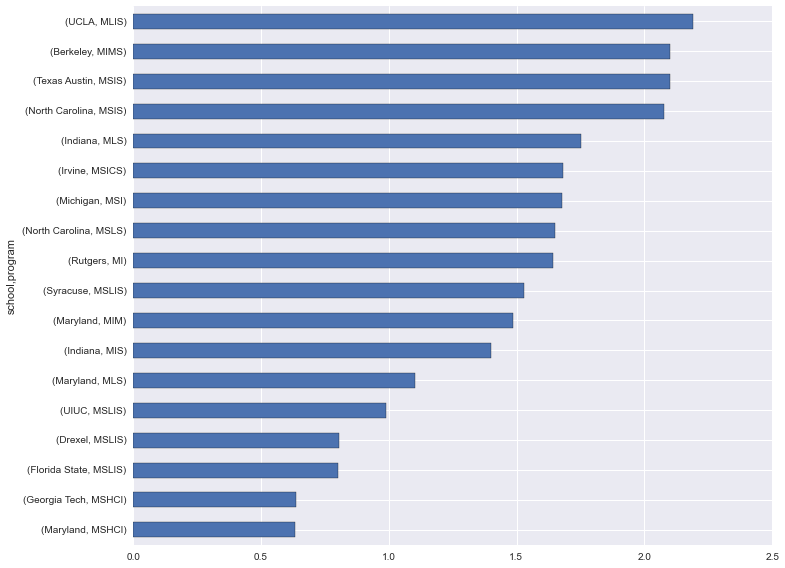

In [379]:
ax = core_complexity.sort(ascending=True, inplace=False).plot(kind="barh",
                                                        figsize=(11,8))
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("complexity_per_program.pdf")

In [380]:
core_complexity

school          program
Maryland        MSHCI      0.633040
Georgia Tech    MSHCI      0.636514
Florida State   MSLIS      0.801819
Drexel          MSLIS      0.803742
UIUC            MSLIS      0.990578
Maryland        MLS        1.102135
Indiana         MIS        1.400617
Maryland        MIM        1.486124
Syracuse        MSLIS      1.528466
Rutgers         MI         1.644243
North Carolina  MSLS       1.650934
Michigan        MSI        1.676235
Irvine          MSICS      1.682467
Indiana         MLS        1.753972
North Carolina  MSIS       2.075929
Texas Austin    MSIS       2.100760
Berkeley        MIMS       2.101786
UCLA            MLIS       2.191350
dtype: float64

In [381]:
proportion_per_program['diversity'] = core_complexity

In [384]:
proportion_per_program_ordered = proportion_per_program.sort(columns="diversity", inplace=False)

In [388]:
proportion_per_program_ordered.drop("diversity", axis=1, inplace=True)

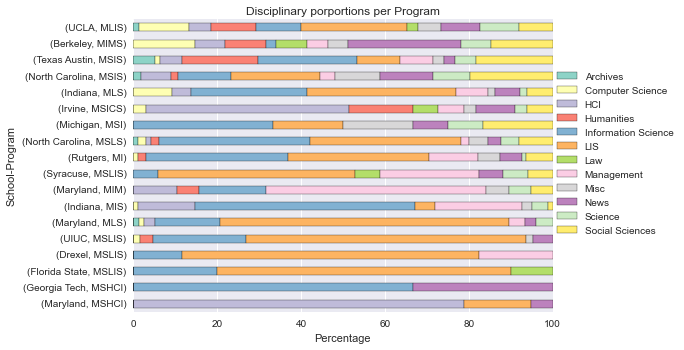

In [523]:
ax = proportion_per_program_ordered.plot(kind="barh", 
                                 stacked=True, 
                                 figsize=(11,8), 
                                 colormap="Set3",
                                 )

ax.set_xlim(0,100)
ax.legend(bbox_to_anchor=(1.31, .85))

fig = ax.get_figure()
ax.set_title("Disciplinary porportions per Program")
ax.set_xlabel('Percentage')
ax.set_ylabel('School-Program')

fig.tight_layout(pad=12)
#fig.savefig("proportion_per_program.png", dpi=300)
fig.savefig("proportion_per_program.pdf")


## Topic areas across the ischools

In [400]:
ischool_discipline_proportions = raw_programs_discipline_counts.groupby(level="aggregates").sum().div(raw_programs_discipline_counts.sum(),level='aggregates') * 100

In [503]:
ischool_discipline_proportions.sort(inplace=False)

aggregates
Archives                0.976139
Law                     0.976139
Computer Science        3.253796
Misc                    3.687636
Science                 4.121475
Humanities              4.338395
News                    5.748373
HCI                     7.158351
Social Sciences         7.266811
Management              7.375271
Information Science    24.403471
LIS                    30.694143
dtype: float64

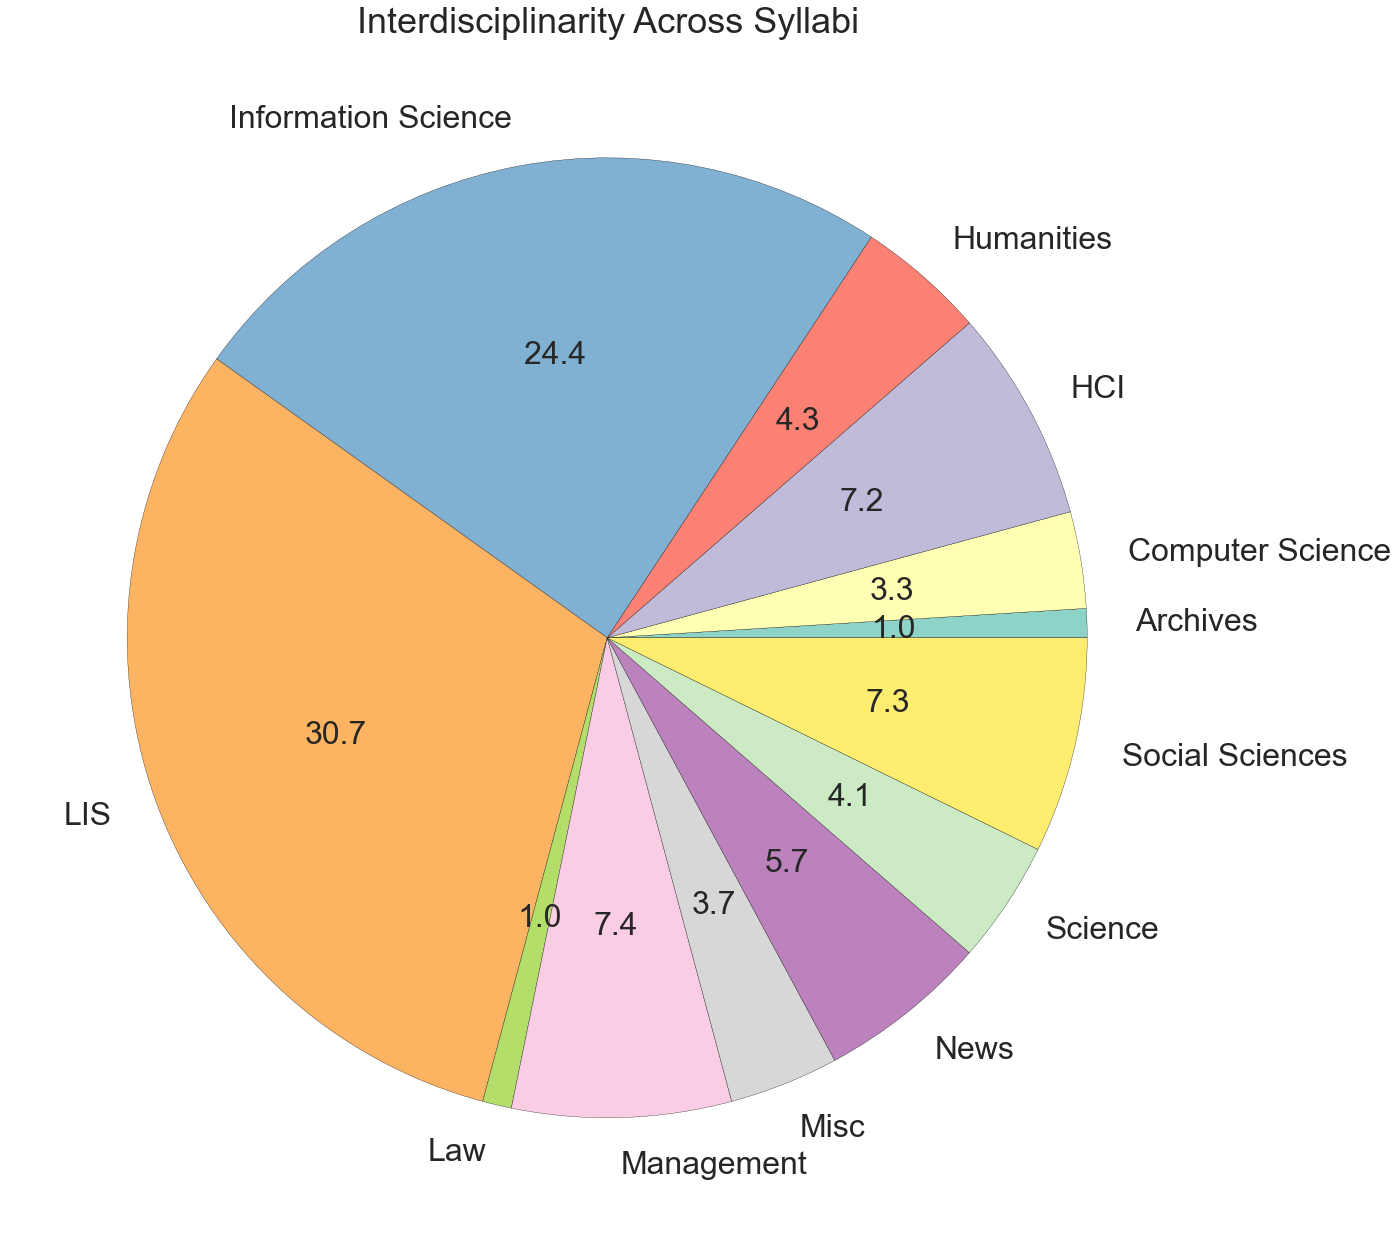

In [506]:
ax = ischool_discipline_proportions.plot(kind="pie",
                                         stacked=True,
                                         figsize=(20,20),
                                         colormap="Set3",
                                         label='',
                                         fontsize=32,
                                         autopct='%.1f')
fig = ax.get_figure()
fig.tight_layout(pad=12)

ax.set_title("Interdisciplinarity Across Syllabi", fontsize=36)



fig.savefig("proportion_all_ischools.png")

## Graphing overlap

In [428]:
cleaned_citations = pd.read_csv("cleaned_cites.csv")

In [464]:
journal_articles = cleaned_citations[cleaned_citations['type'] == 'article']
top_journal_articles = journal_articles.groupby('title').size().sort(inplace=False, ascending=False)

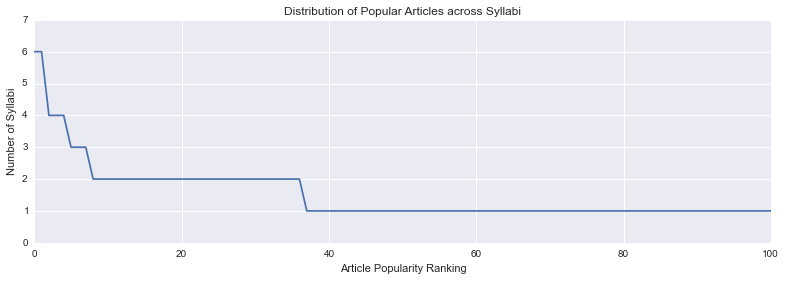

In [519]:
ax = top_journal_articles.plot(kind="line",
                               figsize=(11,4),
                               use_index=False,
                               )

ax.set_xlim(0,100)
ax.set_ylim(0,7)
ax.set_title("Distribution of Popular Articles across Syllabi")
ax.set_xlabel('Article Popularity Ranking')
ax.set_ylabel('Number of Syllabi')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("popular-articles.pdf")

In [473]:
top_journal_articles.head(15)

title
As We May Think                                                                                        6
Information as Thing                                                                                   6
The invisible substrate of information science                                                         4
The design of browsing and berry-picking techniques for online search interface                        4
Metadata for all: Descriptive standards and metadata sharing across libraries, archives and museums    4
Question negotiation and information seeking in libraries                                              3
Inside the search process: Information seeking from the user's perspective                             3
What is a “Document”?                                                                                  3
The Reference Interview: Theories and Practice                                                         2
On the Web at home: Information seeking and Web s

## top journal titles

In [524]:
top_journal_titles = cleaned_citations[cleaned_citations['type'] == 'article'].groupby('journal').size().sort(inplace=False, ascending=False)
top_journal_titles.head(30)

journal
Journal of the American Society for Information Science & Technology    57
Journal of the American Society for Information Science                 38
Journal of Documentation                                                28
Information Processing & Management                                     25
Library Trends                                                          21
College & Research Libraries                                            19
Harvard Business Review                                                 19
Interactions                                                            18
Journal of Information Science                                          17
Journal of Academic Librarianship                                       16
Cataloging & Classification Quarterly                                   14
Library & Information Science Research                                  14
Journal of Library Administration                                       14
Communications of

In [484]:
top_journal_titles.describe()

count    324.000000
mean       2.722222
std        5.064598
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       57.000000
dtype: float64

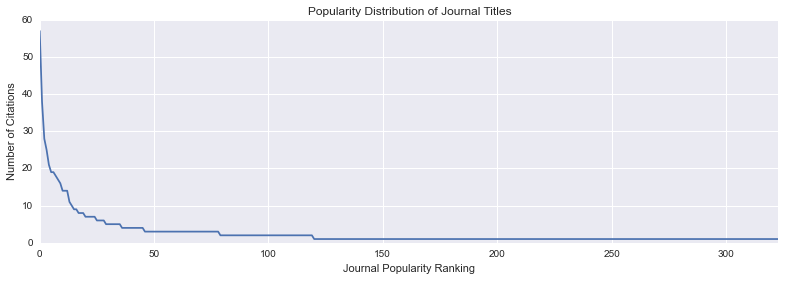

In [517]:
ax = top_journal_titles.plot(kind="line",
                               figsize=(11,4),
                               use_index=False,
                               )

#ax.set_xlim(0,100)
#ax.set_ylim(0,7)
ax.set_title("Popularity Distribution of Journal Titles")
ax.set_xlabel('Journal Popularity Ranking')
ax.set_ylabel('Number of Citations')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("popular-journals.pdf")